# Employee Attrition Prediction for the "Careful Work" Company

**Project Description:** 

HR analysts at "Careful Work" support the business in optimizing personnel management. The company provides data, and the analysts suggest solutions to help prevent financial losses and reduce employee attrition. Machine learning plays a key role in this process, enabling HR specialists to respond more quickly and accurately to business needs.

The company has gathered data about its employees, including their job satisfaction levels. This information comes from surveys that employees fill out, with the satisfaction score calculated on a scale from 0 (completely dissatisfied) to 1 (completely satisfied).

**Research Objective:**  

Help the company minimize unexpected employee resignations using predictions from machine learning models.

**Research Tasks:**
1. Build a model that can predict the employee's job satisfaction level based on the client's data.
2. Build a model that can predict whether an employee will resign from the company based on the client's data.

**Input Data:**

1. Task 1 
id — unique employee identifier;
dept — department where the employee works;
level — job position level;
workload — employee workload level;
employment_years — duration of employment at the company (in years);
last_year_promo — indicates whether there was a promotion in the last year;
last_year_violations — indicates whether the employee violated the employment contract in the last year;
supervisor_evaluation — performance evaluation given by the supervisor;
salary — monthly salary of the employee;
job_satisfaction_rate — employee's job satisfaction level, target variable.  

Training dataset: train_job_satisfaction_rate.csv
Test dataset input features: test_features.csv
Test dataset Target: test_target_job_satisfaction_rate.csv

2. Task 2 
Input features are the same as in the previous task. However, the target variable differs: it is quit — employee resignation from the company.

Training dataset: train_quit.csv
Test dataset input features are the same as in the previous task: test_features.csv
Test dataset Target: test_target_quit.csv

**The research consists of the following parts:**

<a href='#section0'>Task 1. Predicting Employee Job Satisfaction Level</a>  
<a href='#section0_1'>Task 1. Step 1. Data Loading</a>  
<a href='#section0_2'>Task 1. Step 2. Data Preprocessing</a>  
<a href='#section0_3'>Task 1. Step 3. Exploratory Data Analysis</a>  
<a href='#section0_4'>Task 1. Step 4. Data Preparation</a>  
<a href='#section0_5'>Task 1. Step 5. Model Training</a>  
<a href='#section0_6'>Task 1. Step 6. Task #1 Conclusions</a>  
<a href='#section1'>Task 2: Predicting Employee Resignation from the Company</a>  
<a href='#section1_1'>Task 2: Step 1. Data Loading</a>  
<a href='#section1_2'>Task 2: Step 2. Data Preprocessing</a>  
<a href='#section1_3'>Task 2: Step 3. Exploratory Data Analysis</a>  
<a href='#section1_4'>Task 2: Step 4. Adding a New Input Feature</a>  
<a href='#section1_5'>Task 2: Step 5. Data Preparation</a>  
<a href='#section1_6'>Task 2: Step 6. Model Training</a>  
<a href='#section1_7'>Task 2: Step 7. Task #2 Conclusions</a>  
<a href='#section2'>General Conclusions</a>

In [358]:
!pip install -U scikit-learn -q

    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^


In [359]:
!pip install phik -q

    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^


In [360]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# pipeline class
from sklearn.pipeline import Pipeline

# imputation
from sklearn.impute import SimpleImputer

# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, \
                                  PolynomialFeatures, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# performance metrics
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, f1_score, recall_score

# hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier

from phik import phik_matrix

RANDOM_STATE=42
TEST_SIZE=0.25


In [361]:
import warnings 
warnings.simplefilter("ignore")

## Predicting Employee Job Satisfaction Level <a id='section0'></a>

### Data Loading <a id='section0_1'></a>

In [362]:
data_train = pd.read_csv('/Users/dmslavin/Downloads/train_job_satisfaction_rate.csv')
print(data_train.shape)
data_train.head()

(4000, 10)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [363]:
test_features = pd.read_csv('/Users/dmslavin/Downloads/test_features.csv')
print(test_features.shape)
test_features.head()

(2000, 9)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [364]:
test_target = pd.read_csv('/Users/dmslavin/Downloads/test_target_job_satisfaction_rate.csv')
print(test_target.shape)
test_target.head()

(2000, 2)


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


#### Results
The data has been loaded. The training data table contains 4000 rows and 10 columns. It can be split into training and validation sets in a 3:1 ratio. The test data table contains 2000 rows.

### Data Preprocessing <a id='section0_2'></a>

In [365]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [366]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [367]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [368]:
data_train.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [369]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [370]:
test_target.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [371]:
data_train.duplicated().sum()

0

In [372]:
test_features.duplicated().sum()

0

In [373]:
test_target.duplicated().sum()

0

#### Results
The data types in all columns are correct, column names are valid, and there are no obvious duplicates. The data_train and test_features tables contain some missing values in the dept and level columns, which will be handled in the pipeline in section 1.4 Data Preparation.

### Exploratory Data Analysis <a id='section0_3'></a>

In [374]:
# сolumns with categorical and numerical features
cat_col_names = data_train.select_dtypes(exclude='number').columns.tolist()
num_col_names = data_train.drop(['id', 'job_satisfaction_rate'], axis=1).select_dtypes(include='number').columns.tolist()
cat_col_names, num_col_names

(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'],
 ['employment_years', 'supervisor_evaluation', 'salary'])

dept 

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


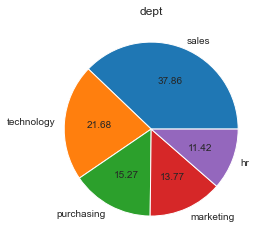

level 

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


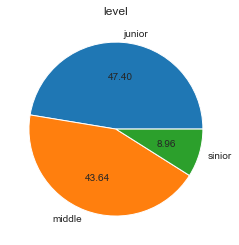

workload 

medium    2066
low       1200
high       734
Name: workload, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


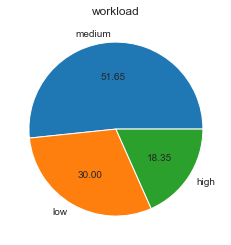

last_year_promo 

no     3880
yes     120
Name: last_year_promo, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


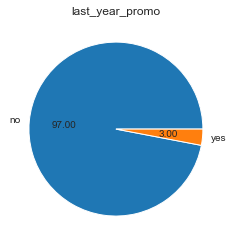

last_year_violations 

no     3441
yes     559
Name: last_year_violations, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


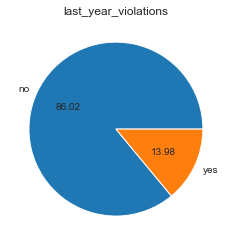

In [375]:
# exploring numerical features in the training data table
for col in cat_col_names:
    print(col, '\n')
    print(data_train[col].value_counts(),'\n')
    print(data_train[col].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
    plt.show()

In [376]:
# fixing the typo in the level name
data_train['level'] = data_train['level'].replace('sinior', 'senior', regex=True)
data_train['level'].value_counts()

junior    1894
middle    1744
senior     358
Name: level, dtype: int64

dept 

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


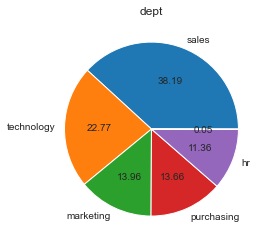

level 

junior    974
middle    854
sinior    171
Name: level, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


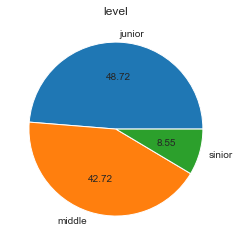

workload 

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


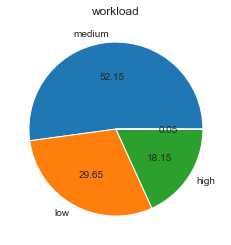

last_year_promo 

no     1937
yes      63
Name: last_year_promo, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


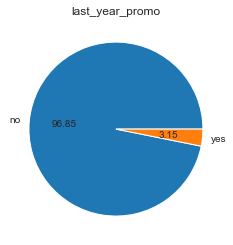

last_year_violations 

no     1738
yes     262
Name: last_year_violations, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


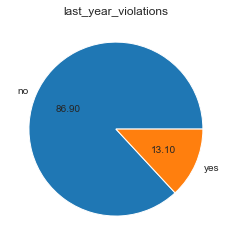

In [377]:
# exploring numerical features in the test data table
for col in cat_col_names:
    print(col, '\n')
    print(test_features[col].value_counts(),'\n')
    print(test_features[col].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
    plt.show()

In [378]:
# fixing the typo in the level name
test_features['level'] = test_features['level'].replace('sinior', 'senior', regex=True)
test_features['level'].value_counts()

junior    974
middle    854
senior    171
Name: level, dtype: int64

In [379]:
# replacing a strange empty value in the "workload" column with NaN
test_features.loc[~test_features['workload'].isin(["low", "medium", "high"]), 'workload'] = np.NaN
test_features['workload'].value_counts()

medium    1043
low        593
high       363
Name: workload, dtype: int64

In [380]:
# replacing a strange empty value in the "dept" column with NaN
test_features.loc[~test_features['dept'].isin(["sales", "technology", "marketing", "hr", "purchasing"]), 'dept'] = np.NaN
test_features['dept'].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

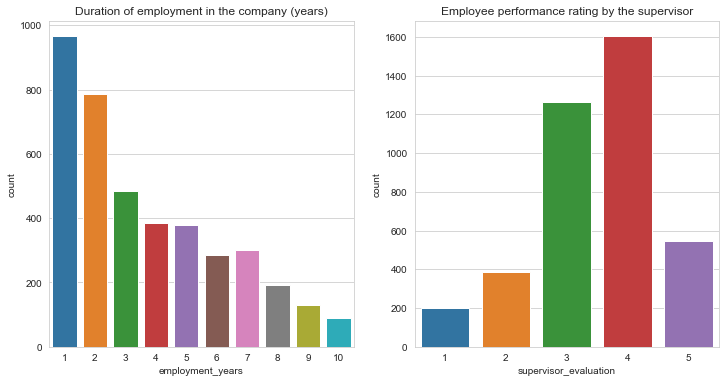

In [381]:
# exploring discrete numerical features for the training data table
fig, ax =plt.subplots(1,2, figsize=(12,6))
sb.countplot(data_train['employment_years'], ax=ax[0]) \
  .set(title='Duration of employment in the company (years)');
sb.countplot(data_train['supervisor_evaluation'], ax=ax[1]) \
  .set(title='Employee performance rating by the supervisor');
fig.show()

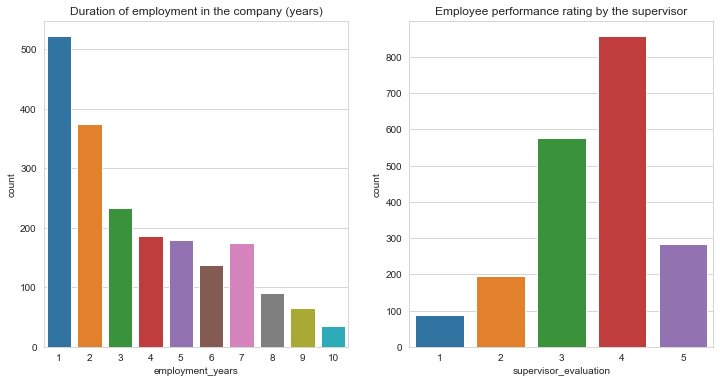

In [382]:
# exploring discrete numerical features for the test data table

fig, ax =plt.subplots(1,2, figsize=(12,6))

sb.countplot(test_features['employment_years'], ax=ax[0]) \
  .set(title='Duration of employment in the company (years)');
sb.countplot(test_features['supervisor_evaluation'], ax=ax[1]) \
  .set(title='Employee performance rating by the supervisor');

fig.show()

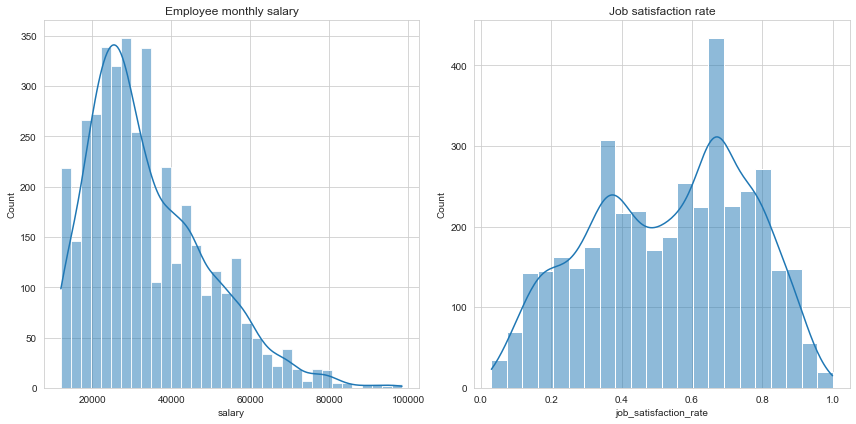

In [383]:
# exploring the continuous numerical feature salary 
# and the target feature job_satisfaction_rate from the training data table

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sb.histplot(data=data_train['salary'], kde=True, ax=axes[0])
axes[0].set_title('Employee monthly salary')
sb.histplot(data=data_train['job_satisfaction_rate'], kde=True, ax=axes[1])
axes[1].set_title('Job satisfaction rate')

plt.tight_layout()
plt.show()

In [384]:
data_train['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

In [385]:
data_train['job_satisfaction_rate'].describe()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

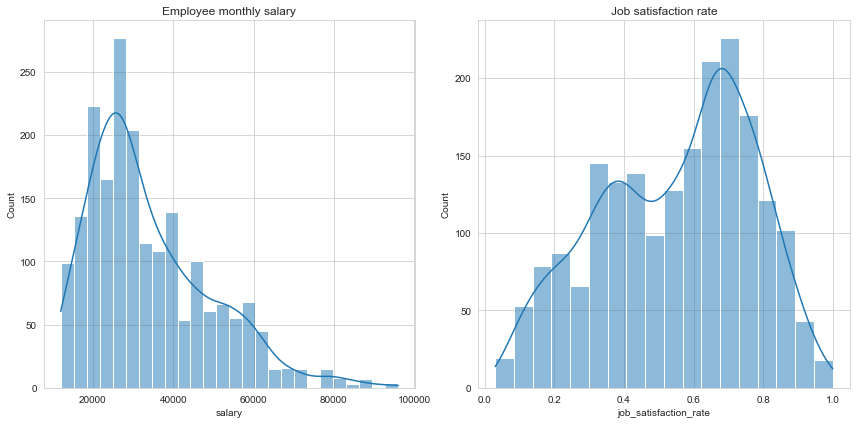

In [386]:
# exploring the continuous numerical feature salary from the test data table
# and the target feature job_satisfaction_rate from the test data table

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sb.histplot(data=test_features['salary'], kde=True, ax=axes[0])
axes[0].set_title('Employee monthly salary')
sb.histplot(data=test_target['job_satisfaction_rate'], kde=True, ax=axes[1])
axes[1].set_title('Job satisfaction rate')

plt.tight_layout()
plt.show()

In [387]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

In [388]:
test_target['job_satisfaction_rate'].describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

In [389]:
# correlation matrix using phik for the training data

interval_columns = ['salary', 'job_satisfaction_rate']

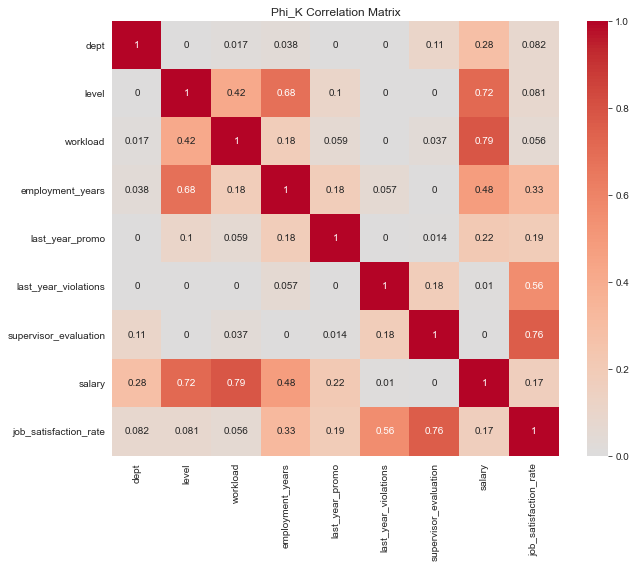

In [390]:
corr_matrix = data_train.drop('id', axis=1).phik_matrix(interval_cols=interval_columns)


plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Phi_K Correlation Matrix')
plt.show()

In [391]:
# final table with test data

data_test = test_features.merge(test_target, on='id')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1997 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               1999 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


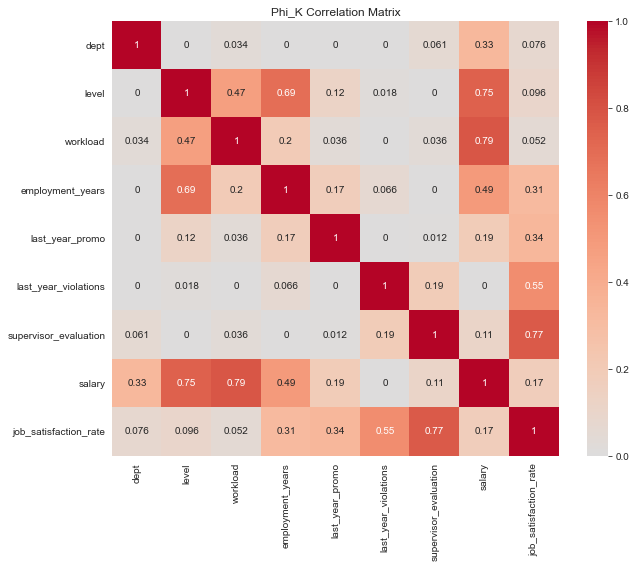

In [392]:
# correlation matrix using phik for the test data

corr_matrix = data_test.drop('id', axis=1).phik_matrix(interval_cols=interval_columns)


plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Phi_K Correlation Matrix')
plt.show()

#### Results

- The relevant data in the training and test data tables have similar distributions, so the conclusions will be made jointly.

- **Categorical features**:
   - Department where the employee works: sales (38%), technology (22%), marketing (14%), purchasing (14%), HR (11%)
   - Job level: junior (48%), middle (43%), senior (8%) — the typo in the word 'senior' was corrected
   - Employee workload level: low (30%), medium (51%), high (19%)
   - Whether the employee received a promotion in the last year: no (97%), yes (3%)
   - Whether the employee violated the labor contract in the last year: no (87%), yes (13%)
   - Several values in the 'dept' and 'workload' columns were found with spaces, which were replaced with NaN and will be handled in the pipeline in the next section.  


- **Discrete numerical features**:
   - Duration of employment in the company (in years): employees have worked in the company for 1 to 10 years. Most employees have been with the company for only one year, followed by a decreasing trend, with the fewest employees having worked for 10 years.
   - Employee performance rating given by the supervisor: most often, the supervisor rates employees with a 4, followed by 3, 5, 2, and 1.  
   


- **Continuous numerical feature — monthly salary**: salary ranges from 12 to 98 thousand rubles. The median salary is 30 thousand rubles. The distribution is clearly not normal.  

- **Target feature — employee satisfaction level**: the range of values is from 0.03 to 1. The histogram shows two peaks around 0.4 and 0.7. The median is around 0.57. It's good that most employees are more satisfied than dissatisfied :) The distribution is also not normal.  

- **Correlation between features** (correlation coefficients in the training and test data are similar):
   - There is a correlation between job level and years of experience in the company (0.68)
   - Correlation between job level and salary (0.72)
   - Correlation between workload level and salary (0.79)
   - Correlation between supervisor performance rating and employee satisfaction level (0.76)
   - Other correlation coefficients are lower.

### Data Preparation <a id='section0_4'></a>

In [393]:
# checking the training set for duplicates
data_train.drop(['id','job_satisfaction_rate'], axis=1).duplicated().sum()

1492

In [394]:
# selecting only unique rows for the training set
Xy_train_no_duplicates = data_train[data_train.drop(['id','job_satisfaction_rate'], axis=1).duplicated() == False]
X_train, y_train = (Xy_train_no_duplicates.drop(['id','job_satisfaction_rate'], axis=1),
                    Xy_train_no_duplicates['job_satisfaction_rate']
                   )
X_train.shape,  y_train.shape                 

((2508, 8), (2508,))

In [395]:
# test set

X_test, y_test = (data_test.drop(['id','job_satisfaction_rate'], axis=1),
                  data_test['job_satisfaction_rate']
                 )
X_test.shape, y_test.shape

((2000, 8), (2000,))

In [396]:
# feature names lists

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [397]:
# pipeline for feature preparation from the ohe_columns list: handling missing values and OHE encoding
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )

In [398]:
# pipeline for feature preparation from the ord_columns list: handling missing values and Ordinal encoding
# SimpleImputer + OE

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# pipeline for data preparation

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                (...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'senior'],
                                                                             ['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['level', 'workload']),
                                ('num', MinMaxScaler(),
                                 ['employment_years', 'supervisor_evaluation',
                                  'salary'])])

#### Result

- The training and test data have been prepared.  
- A pipeline for data preparation was created  
    - For the features 'last_year_promo' and 'last_year_violations', missing values are first filled using SimpleImputer, then encoded using OneHotEncoder, and SimpleImputer is applied again.  
    - For the features 'dept', 'level', 'workload', missing values are first filled using SimpleImputer, then the data is encoded using OrdinalEncoder, and SimpleImputer is applied again.  
    - For the remaining (numerical) features, MinMaxScaler is used.

### Model Training <a id='section0_5'></a>

In [399]:
# creating a new metric — SMAPE (symmetric mean absolute percentage error)
# function to calculate the metric (the smaller the metric, the better)
def custom_metric(y_test, y_pred):
    df = pd.DataFrame(
    {
        'y_test_col': y_test,
        'y_pred_col': y_pred
    })
    df['metric'] = df.apply(lambda row: 0 if (np.abs(row['y_test_col']) +  np.abs(row['y_pred_col'])==0) 
                                    else np.abs(row['y_test_col'] - row['y_pred_col']) 
                                    / ((np.abs(row['y_test_col']) +  np.abs(row['y_pred_col'])) / 2), axis=1) 
    return df['metric'].sum() * 100 / len(df['metric'])
# metric
SMAPE = make_scorer(custom_metric, greater_is_better=False)

In [400]:
#k_select = 5
#selector = SelectKBest(f_classif, k=k_select)

# final pipeline: data prepaprocessing and DecisionTreeClassifier model + PolynomialFeatures

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
# dictionary for the DecisionTreeClassifier() model

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None] + [i for i in range(2, 7)],
        'models__max_features': range(5, 16),
        'models__min_samples_split': range(3, 13),
        'models__min_samples_leaf': range(3, 13),
        'preprocessor__num': [PolynomialFeatures(degree=2, include_bias=False)] 
        
    }
]

In [401]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=SMAPE,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)


print('Best model and its parameters is\n\n', randomized_search.best_estimator_)
print ('The metric of the best model using cross-validation is', np.abs(randomized_search.best_score_))

Best model and its parameters is

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                           

In [402]:
selector = SelectKBest(f_classif, k=9)

# final pipeline: data preprocessing and linear models
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('feature_selection', selector),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    # dictionary for the LinearRegression() model 
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': range(0,200),
        'preprocessor__num': [PolynomialFeatures(degree=2, include_bias=False), \
                              StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': range(0,200),
        'preprocessor__num': [PolynomialFeatures(degree=2, include_bias=False), \
                              StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [PolynomialFeatures(degree=2, include_bias=False), \
                              StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [403]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=SMAPE,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)


print('Best model and its parameters is\n\n', randomized_search.best_estimator_)
print ('The metric of the best model using cross-validation is', np.abs(randomized_search.best_score_))

Best model and its parameters is

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                           

In [404]:
# final pipeline: data preprocessing and linear model 0
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    # dictionary for the DecisionTreeClassifier() model  
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(6, 12),
        'models__min_samples_split': range(5, 8),
        'models__min_samples_leaf': range(1, 3),

        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    }
]


grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring=SMAPE, 
    n_jobs = -1
)

grid.fit(X_train, y_train)


print('Best model and its parameters is\n\n', grid.best_estimator_)
print ('The metric of the best model using cross-validation is', np.abs(grid.best_score_))

Best model and its parameters is

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                           

In [405]:
# metric of the best model on the test set
model0 = grid.best_estimator_

print(f'SMAPE Metric on the Test Set: {np.abs(SMAPE(model0, X_test, y_test))}')

SMAPE Metric on the Test Set: 14.348121896747728


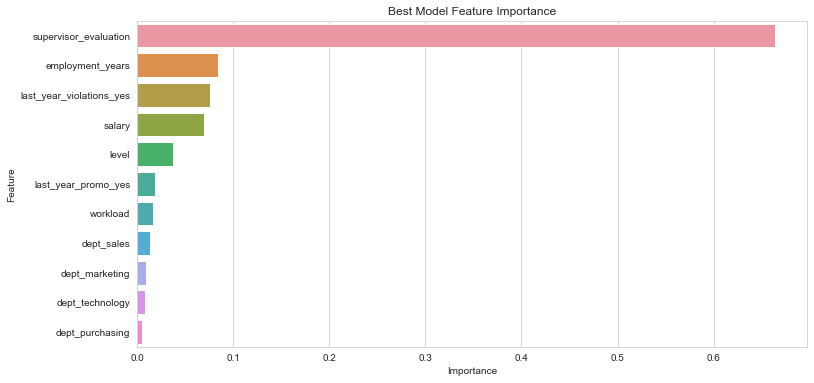

In [406]:
# feature importance
feature_importances = pd.DataFrame(
    {
        'Feature': np.concatenate((model0['preprocessor'].transformers_[0][1].get_feature_names_out(),
                   model0['preprocessor'].transformers_[1][1].get_feature_names_out(),
                   model0['preprocessor'].transformers_[2][1].get_feature_names_out())),
        'Importance': model0.steps[1][1].feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
ax = sb.barplot(x='Importance', y='Feature', data=feature_importances) \
       .set(title='Best Model Feature Importance')

In [407]:
# check the best model for adequacy using DummyRegressor
dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 
print('SMAPE metric for DummyRegressor', np.abs(SMAPE(dummy_mean, X_test, y_test)))

SMAPE metric for DummyRegressor 38.811078852384206


### Task #1 Conclusions <a id='section0_6'></a>

#### Results

- Best model: DecisionTreeRegressor(max_depth=11, min_samples_leaf=2, min_samples_split=6, random_state=42)
- Best model cross-validation score: 18.92
- SMAPE score on the test set: 14.34

- The model adequacy check showed that the quality of the best model exceeds the prediction of the mean value of the training set. The SMAPE score for DummyRegressor was 38.81.

- For the task of predicting employee job satisfaction level — a continuous numerical feature — two types of models were trained: Linear Regression (with and without regularization) and DecisionTreeRegressor with different hyperparameters.  
  OneHotEncoder and OrdinalEncoder were used for encoding, while StandardScaler and MinMaxScaler were used as scalers. There was also an attempt to use polynomial features, but it worsened the model performance.

- The DecisionTree model performed better than Logistic Regression, as there were more categorical features than numerical ones. GridSearch was used to select the model that showed the best result on the custom SMAPE metric (symmetric mean absolute percentage error).

- Most important features:
  - Employee performance rating given by the supervisor
  - Duration of employment in the company (in years)
  - Employee monthly salary

- Least important features:
  - Whether the employee received a promotion in the last year
  - Workload level
  - Job level


## Predicting Employee Resignation from the Company<a id='section1'></a>

### Data Loading <a id='section1_1'></a>

In [408]:
quit_train = pd.read_csv('/Users/dmslavin/Downloads/train_quit.csv')
print(quit_train.shape)

quit_train.head()

(4000, 10)


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [409]:
# check that the data in the data_train and quit_train tables are different
data_train.drop(['job_satisfaction_rate'], axis=1).sort_values(by='id').equals(quit_train.drop(['quit'], axis=1).sort_values(by='id'))

False

The input features of the test set are the same as in the previous task: we will use the **test_features** table


In [410]:
quit_test_target = pd.read_csv('/Users/dmslavin/Downloads/test_target_quit.csv')
print(quit_test_target.shape)
quit_test_target.head()

(2000, 2)


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [411]:
# combining the test data into a single table
data_quit_test = test_features.merge(quit_test_target, on='id')
data_quit_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


#### Results

The data has been loaded. The training dataset has 4000 rows and 10 columns. It will be possible to split it into training and validation sets in a 3:1 ratio. The test dataset has 2000 rows.


### Data Preprocessing <a id='section1_2'></a>

In [412]:
quit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [413]:
data_quit_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


In [414]:
quit_train.duplicated().sum()

0

In [415]:
data_quit_test.duplicated().sum()

0

#### Results

The data types in all columns are correct, column names are accurate, and there are no obvious duplicates. The `data_quit_test` table contains some missing values in the `dept`, `level`, and `workload` columns, which will be handled in the data preparation pipeline in section 2.4.


### Exploratory Data Analysis <a id='section1_3'></a>

#### Exploratory Analysis

In [416]:
# columns with categorical and numerical features
# we will use the variables from the first part

cat_col_names, num_col_names

(['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'],
 ['employment_years', 'supervisor_evaluation', 'salary'])

dept 

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


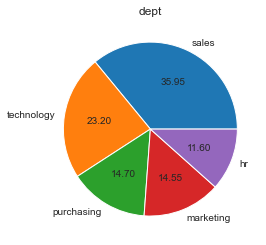

level 

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


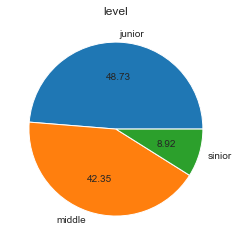

workload 

medium    2118
low       1208
high       674
Name: workload, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


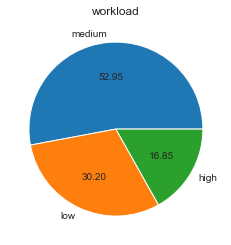

last_year_promo 

no     3887
yes     113
Name: last_year_promo, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


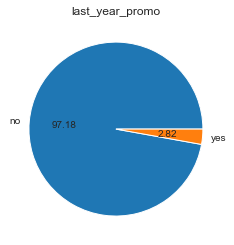

last_year_violations 

no     3455
yes     545
Name: last_year_violations, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


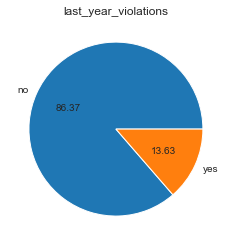

In [417]:
# explore numerical features in the training data set
for col in cat_col_names:
    print(col, '\n')
    print(quit_train[col].value_counts(),'\n')
    print(quit_train[col].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
    plt.show()

dept 

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


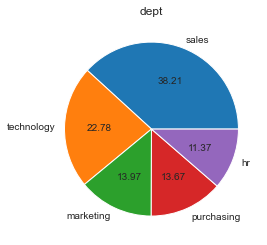

level 

junior    974
middle    854
senior    171
Name: level, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


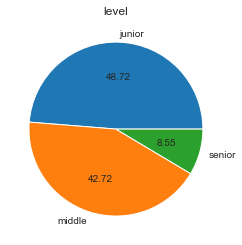

workload 

medium    1043
low        593
high       363
Name: workload, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


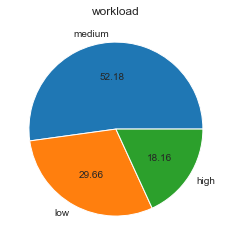

last_year_promo 

no     1937
yes      63
Name: last_year_promo, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


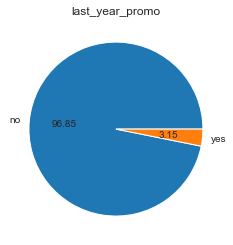

last_year_violations 

no     1738
yes     262
Name: last_year_violations, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


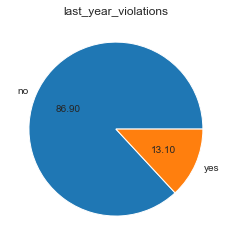

In [418]:
# explore numerical features in the test data set

for col in cat_col_names:
    print(col, '\n')
    print(data_quit_test[col].value_counts(),'\n')
    print(data_quit_test[col].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
    plt.show()

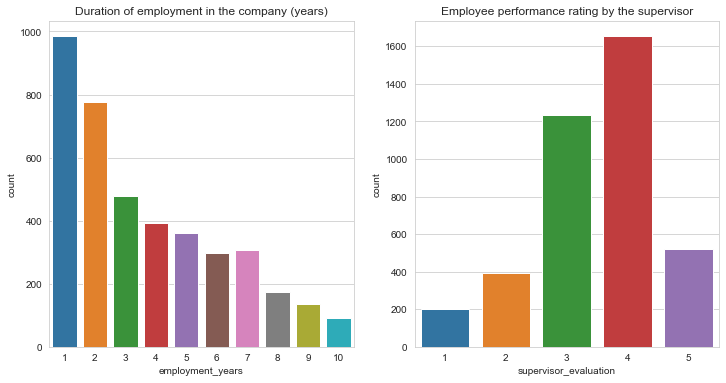

In [419]:
# explore discrete numerical features for the training data set

fig, ax =plt.subplots(1,2, figsize=(12,6))
sb.countplot(quit_train['employment_years'], ax=ax[0]) \
  .set(title='Duration of employment in the company (years)');
sb.countplot(quit_train['supervisor_evaluation'], ax=ax[1]) \
  .set(title='Employee performance rating by the supervisor');
fig.show()

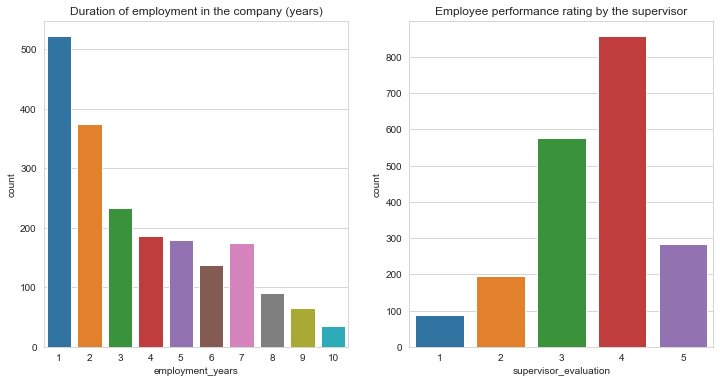

In [420]:
# explore discrete numerical features for the test data set

fig, ax =plt.subplots(1,2, figsize=(12,6))
sb.countplot(data_quit_test['employment_years'], ax=ax[0]) \
  .set(title='Duration of employment in the company (years)');
sb.countplot(data_quit_test['supervisor_evaluation'], ax=ax[1]) \
  .set(title='Employee performance rating by the supervisor');
fig.show()

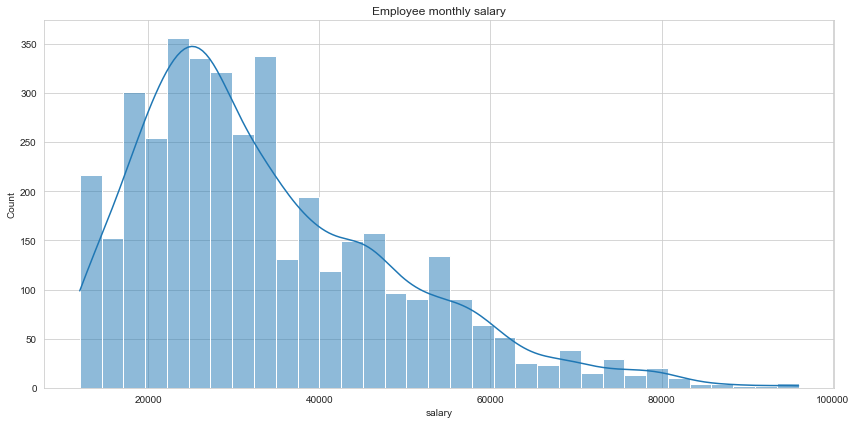

In [421]:
# explore continuous numerical feature salary (training set)

fig, axes = plt.subplots(figsize=(12, 6))

sb.histplot(data=quit_train['salary'], kde=True)
axes.set_title('Employee monthly salary')

plt.tight_layout()
plt.show()

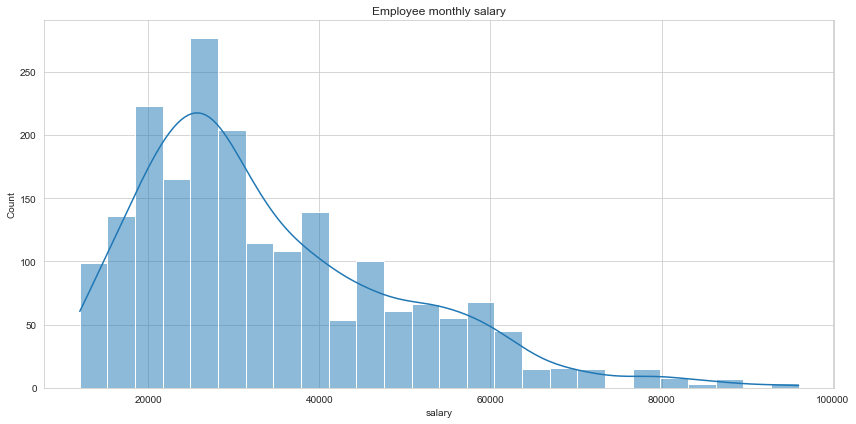

In [422]:
# explore continuous numerical feature salary (test set)

fig, axes = plt.subplots(figsize=(12, 6))

sb.histplot(data=data_quit_test['salary'], kde=True)
axes.set_title('Employee monthly salary')

plt.tight_layout()
plt.show()

no     2872
yes    1128
Name: quit, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


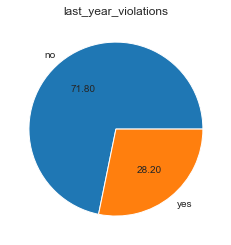

In [423]:
# explore the target variable 'quit' from the training data table
print(quit_train['quit'].value_counts(),'\n')
print(quit_train['quit'].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
plt.show()

no     1436
yes     564
Name: quit, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


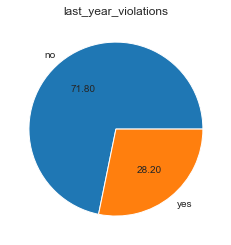

In [424]:
# explore the target variable 'quit' from the test data table
print(data_quit_test['quit'].value_counts(),'\n')
print(data_quit_test['quit'].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
plt.show()

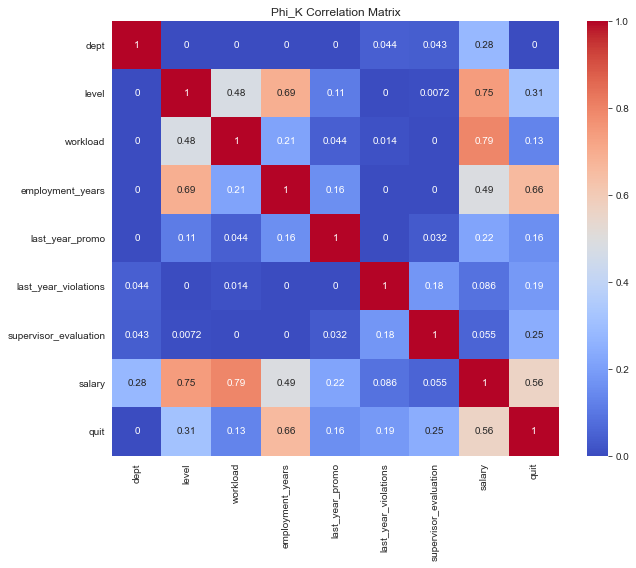

In [425]:
# correlation matrix using phik for the training data

interval_columns = ['supervisor_evaluation', 'salary', 'job_satisfaction_rate']
corr_matrix = quit_train.drop('id', axis=1).phik_matrix(interval_cols=interval_columns)


plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm').set(title='Phi_K Correlation Matrix')
#plt.title('Phi_K Correlation Matrix')
plt.show()

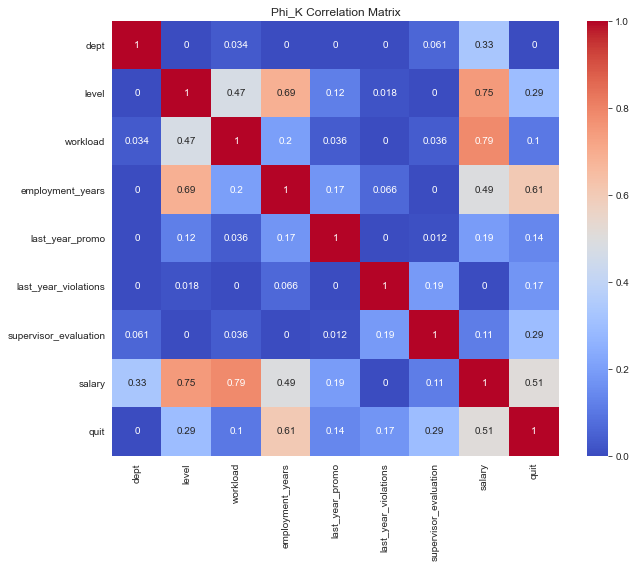

In [426]:
# correlation matrix using phik for the test data

interval_columns = ['supervisor_evaluation', 'salary', 'job_satisfaction_rate']
corr_matrix = data_quit_test.drop('id', axis=1).phik_matrix(interval_cols=interval_columns)


plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm').set(title='Phi_K Correlation Matrix')
#plt.title('Phi_K Correlation Matrix')
plt.show()

In [427]:
# fix the typo in the level name

quit_train['level'] = quit_train['level'].replace('sinior', 'senior', regex=True)
quit_train['level'].value_counts()

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

In [428]:
# fix the typo in the level name

data_quit_test['level'] = data_quit_test['level'].replace('sinior', 'senior', regex=True)
data_quit_test['level'].value_counts()

junior    974
middle    854
senior    171
Name: level, dtype: int64

#### "Portrait" of a "quit employee"

no     2872
yes    1128
Name: quit, dtype: int64 

AxesSubplot(0.260833,0.125;0.503333x0.755)


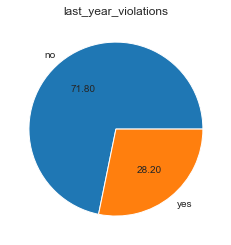

In [429]:
# feature - Employee quit

print(quit_train['quit'].value_counts(),'\n')
print(quit_train['quit'].value_counts().plot(kind='pie', title=col, ylabel='', autopct='%.2f'))
plt.show()

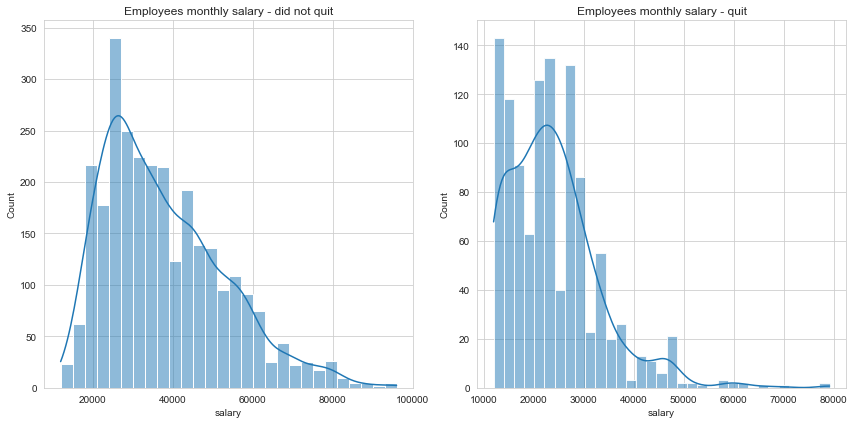

Average salary for employees - did not quit:  37702.22841225627
Average salary for employees - quit:  23885.106382978724


In [430]:
# monthly salary
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sb.histplot(data=quit_train.query('quit=="no"')['salary'], kde=True, ax=axes[0])
axes[0].set_title('Employees monthly salary - did not quit')
sb.histplot(data=quit_train.query('quit=="yes"')['salary'], kde=True, ax=axes[1])
axes[1].set_title('Employees monthly salary - quit')

plt.tight_layout()
plt.show()

print('Average salary for employees - did not quit: ', quit_train.query('quit=="no"')['salary'].mean())
print('Average salary for employees - quit: ', quit_train.query('quit=="yes"')['salary'].mean())

Average duration of employment in the company - did not quit (years):  4.430710306406685
Average duration of employment in the company - quit (years):  1.8448581560283688


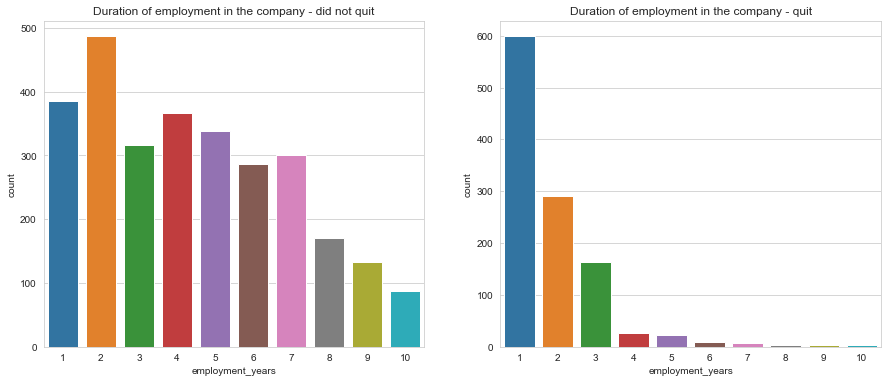

In [431]:
# duration of employment in the company
fig, ax =plt.subplots(1,2, figsize=(15,6))

sb.countplot(quit_train.query('quit=="no"')['employment_years'], ax=ax[0]) \
  .set(title='Duration of employment in the company - did not quit');
sb.countplot(quit_train.query('quit=="yes"')['employment_years'], ax=ax[1]) \
  .set(title='Duration of employment in the company - quit');

fig.show()

print('Average duration of employment in the company - did not quit (years): ', 
      quit_train.query('quit=="no"')['employment_years'].mean())
print('Average duration of employment in the company - quit (years): ', 
      quit_train.query('quit=="yes"')['employment_years'].mean())

Employee performance rating by the supervisor - did not quit:  3.643105849582173
Employee performance rating by the supervisor - quit:  3.0460992907801416


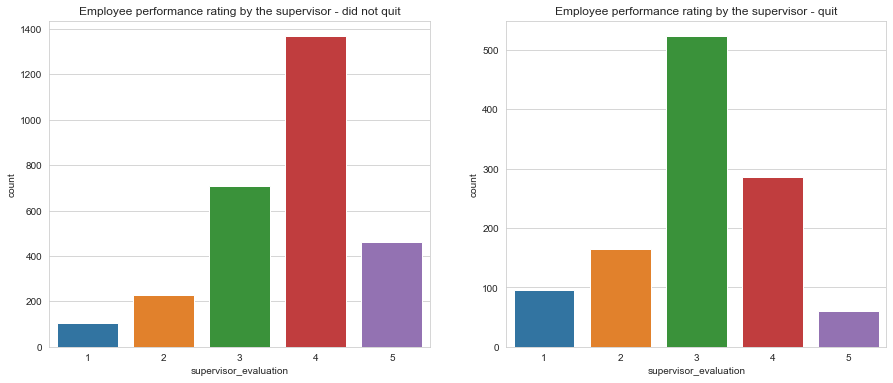

In [432]:
fig, ax =plt.subplots(1,2, figsize=(15,6))

sb.countplot(quit_train.query('quit=="no"')['supervisor_evaluation'], ax=ax[0]) \
  .set(title='Employee performance rating by the supervisor - did not quit');
sb.countplot(quit_train.query('quit=="yes"')['supervisor_evaluation'], ax=ax[1]) \
  .set(title='Employee performance rating by the supervisor - quit');

fig.show()

print('Employee performance rating by the supervisor - did not quit: ', 
      quit_train.query('quit=="no"')['supervisor_evaluation'].mean())
print('Employee performance rating by the supervisor - quit: ', 
      quit_train.query('quit=="yes"')['supervisor_evaluation'].mean())

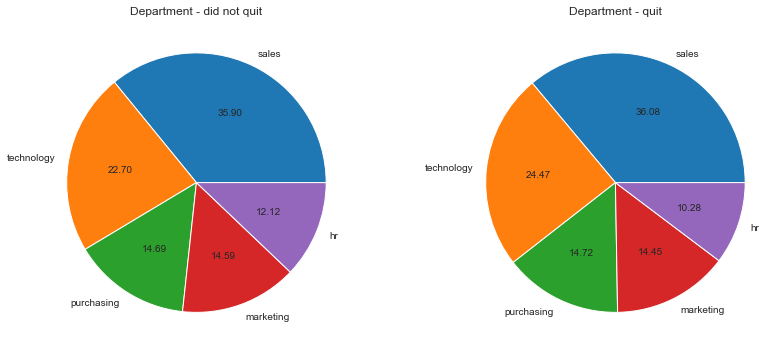

In [433]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sb.set_style("whitegrid")
axes[0].pie(quit_train.query('quit=="no"')['dept'].value_counts(), 
            labels=quit_train.query('quit=="no"')['dept'].value_counts().index, autopct='%.2f') 
axes[0].set_title('Department - did not quit')
axes[1].pie(quit_train.query('quit=="yes"')['dept'].value_counts(), 
            labels=quit_train.query('quit=="yes"')['dept'].value_counts().index, autopct='%.2f') 
axes[1].set_title('Department - quit')

plt.tight_layout()
plt.show()

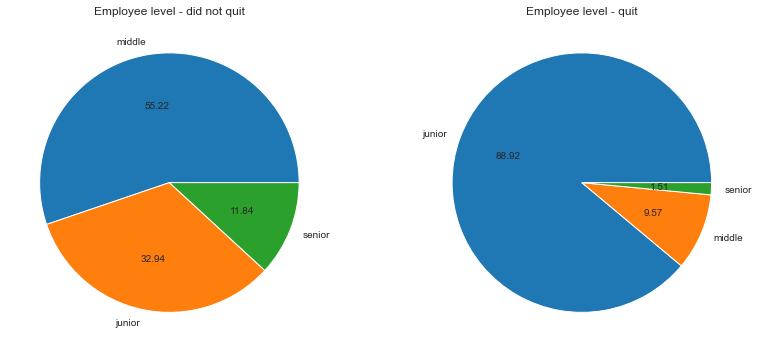

In [434]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sb.set_style("whitegrid")
axes[0].pie(quit_train.query('quit=="no"')['level'].value_counts(), 
            labels=quit_train.query('quit=="no"')['level'].value_counts().index, autopct='%.2f') 
axes[0].set_title('Employee level - did not quit')
axes[1].pie(quit_train.query('quit=="yes"')['level'].value_counts(), 
            labels=quit_train.query('quit=="yes"')['level'].value_counts().index, autopct='%.2f') 
axes[1].set_title('Employee level - quit')

plt.tight_layout()
plt.show()

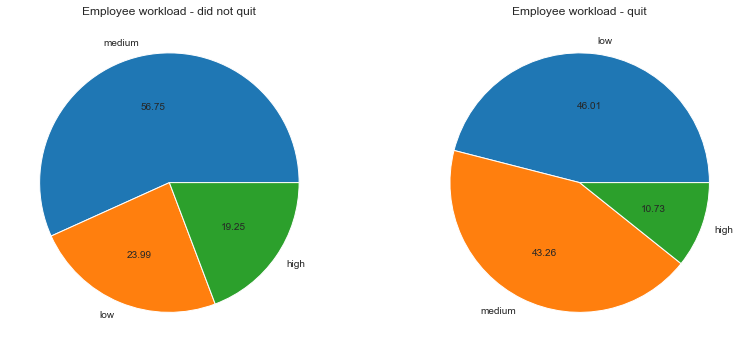

In [435]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sb.set_style("whitegrid")
axes[0].pie(quit_train.query('quit=="no"')['workload'].value_counts(), 
            labels=quit_train.query('quit=="no"')['workload'].value_counts().index, autopct='%.2f') 
axes[0].set_title('Employee workload - did not quit')
axes[1].pie(quit_train.query('quit=="yes"')['workload'].value_counts(), 
            labels=quit_train.query('quit=="yes"')['workload'].value_counts().index, autopct='%.2f') 
axes[1].set_title('Employee workload - quit')

plt.tight_layout()
plt.show()

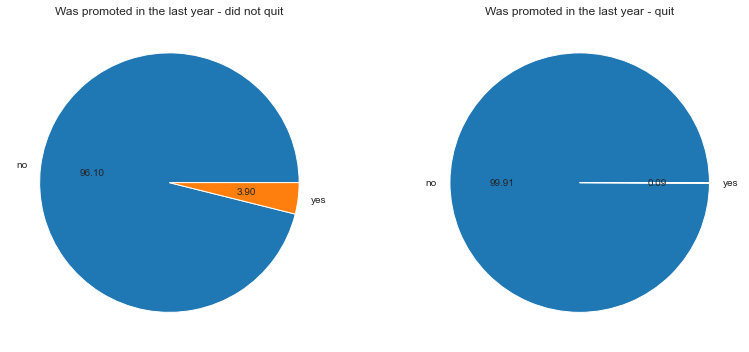

In [436]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sb.set_style("whitegrid")
axes[0].pie(quit_train.query('quit=="no"')['last_year_promo'].value_counts(), 
            labels=quit_train.query('quit=="no"')['last_year_promo'].value_counts().index, autopct='%.2f') 
axes[0].set_title('Was promoted in the last year - did not quit')
axes[1].pie(quit_train.query('quit=="yes"')['last_year_promo'].value_counts(), 
            labels=quit_train.query('quit=="yes"')['last_year_promo'].value_counts().index, autopct='%.2f') 
axes[1].set_title('Was promoted in the last year - quit')

plt.tight_layout()
plt.show()

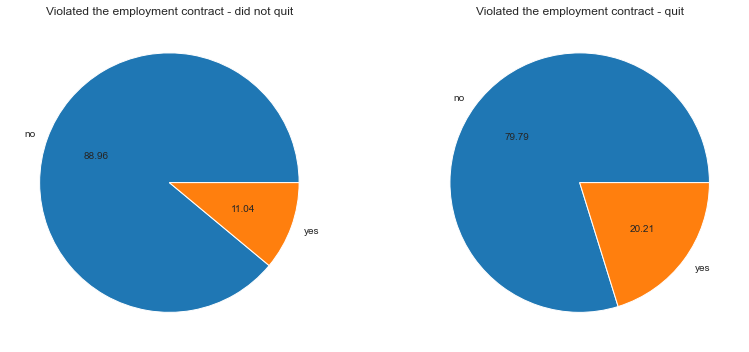

In [437]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sb.set_style("whitegrid")
axes[0].pie(quit_train.query('quit=="no"')['last_year_violations'].value_counts(), 
            labels=quit_train.query('quit=="no"')['last_year_violations'].value_counts().index, autopct='%.2f') 
axes[0].set_title('Violated the employment contract - did not quit')
axes[1].pie(quit_train.query('quit=="yes"')['last_year_violations'].value_counts(), 
            labels=quit_train.query('quit=="yes"')['last_year_violations'].value_counts().index, autopct='%.2f') 
axes[1].set_title('Violated the employment contract - quit')

plt.tight_layout()
plt.show()

**Results:**

1. **Monthly salary.** Employees who left the company tend to have a lower average salary than those who stayed. The histogram shows that many employees who left had the lowest salary levels.
   - Average salary for employees who did not leave: 37,702 rubles
   - Average salary for employees who left: 23,885 rubles

2. **Duration of employment at the company.** Employees who leave tend to have been with the company for a shorter period.
   - Average duration of employment for employees who did not leave (in years): 4.43 years
   - Average duration of employment for employees who left (in years): 1.85 years

3. **Supervisor's performance rating.** Employees who left tend to have a lower average performance rating from their supervisors. The most common rating for employees who left is 3.
   - Average performance rating for employees who did not leave: 3.64
   - Average performance rating for employees who left: 3.05

4. **Department.** The percentage of employees working in the purchasing, sales, and marketing departments is roughly the same for both those who left and those who stayed. Fewer employees leave from the HR department (a 2% difference), while more employees leave from the technology department (a 2% difference).

5. **Job level.**
   - Employees at the junior level leave the company most frequently, with 89% of those who left being juniors. The percentages for middle and senior positions are 9.5% and 1.5%, respectively.
   - Among employees who did not leave, the distribution is: middle (55%), junior (33%), senior (12%).

6. **Workload level.**
   - Employees with low and medium workload levels tend to leave more frequently, with 46% and 43% of leavers falling into these categories, while only 11% had a high workload.
   - Among employees who stayed, the distribution is: medium (57%), low (24%), high (19%).

7. **Promotion in the last year for employees who left.** Employees who left the company were rarely promoted in the past year (with a few exceptions). Those who stayed were promoted in 3% of cases. This feature does not have much significance, as the percentage of those promoted is too small.

8. **Violation of the labor contract for employees who left.** Employees who left were twice as likely to have violated the labor contract.

_A typical employee who would quit might be described as:_ an employee from the technology department, in a junior position, with a salary below average, low workload, a low performance rating from their supervisor, who was not promoted in the past year, and who violated the labor contract in the past year.


#### Checking the statement that employee satisfaction level influences whether the employee will leave the company.

In [438]:
data_quit_test_jsr = data_quit_test.merge(test_target, on='id')
data_quit_test_jsr.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,no,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,no,0.72
2,467458,sales,middle,low,5,no,no,4,19200,no,0.64
3,418655,sales,middle,low,6,no,no,4,19200,no,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,no,0.75


In [439]:
print('The average job satisfaction for an employee who did not quit is ', 
      data_quit_test_jsr.query('quit=="no"')['job_satisfaction_rate'].mean())
print('The average job satisfaction for an employee who quit is', 
      data_quit_test_jsr.query('quit=="yes"')['job_satisfaction_rate'].mean())

The average job satisfaction for an employee who did not quit is  0.6120403899721449
The average job satisfaction for an employee who quit is 0.38771276595744686


In [440]:
# correlation matrix using phik
interval_columns = ['job_satisfaction_rate']
corr_matrix = data_quit_test_jsr[['job_satisfaction_rate', 'quit']].phik_matrix(interval_cols=interval_columns)
corr_matrix

,job_satisfaction_rate,quit
job_satisfaction_rate,1.000000,0.610263
quit,0.610263,1.000000


Text(0.5, 0, 'index')

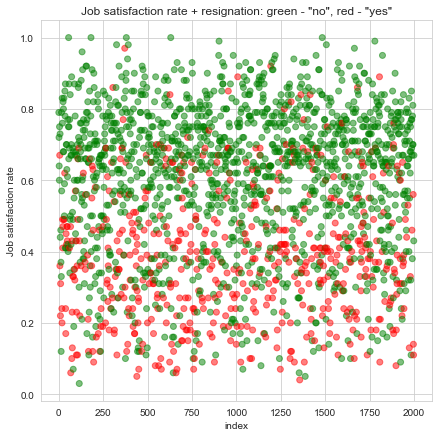

In [441]:
# scatter plots for job satisfaction feature, indicating whether the employee quit or not

fig, axes = plt.subplots(figsize=(7, 7))
colors = data_quit_test_jsr['quit'].apply(lambda x: 'green' if x == 'no' else 'red')

axes.scatter(data_quit_test_jsr.index, data_quit_test_jsr['job_satisfaction_rate'], color=colors, alpha=0.5)
axes.set_title('Job satisfaction rate + resignation: green - "no", red - "yes"')
axes.set_ylabel('Job satisfaction rate')
axes.set_xlabel('index')

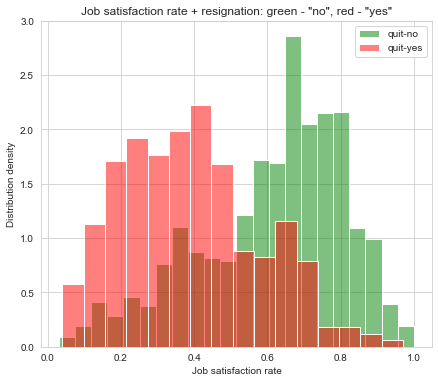

In [442]:
#labeled histograms
fig, axes = plt.subplots(figsize=(7, 6))
sb.histplot(data_quit_test_jsr.query('quit=="no"')['job_satisfaction_rate'], 
            stat='density', common_norm=False, color='green', alpha=0.5)
sb.histplot(data_quit_test_jsr.query('quit=="yes"')['job_satisfaction_rate'], 
            stat='density', common_norm=False, color='red', alpha=0.5)
axes.set_title('Job satisfaction rate + resignation: green - "no", red - "yes"')
axes.set_xlabel('Job satisfaction rate')
axes.set_ylabel('Distribution density')
axes.legend(['quit-no', 'quit-yes'])

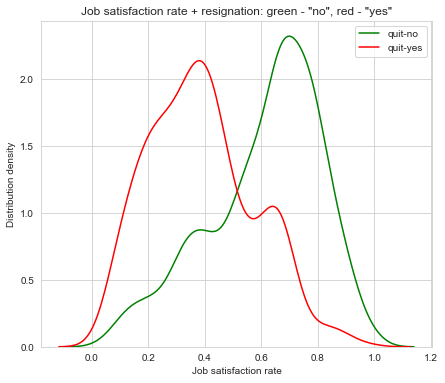

In [443]:
#plots
fig, axes = plt.subplots(figsize=(7, 6))
sb.kdeplot(data_quit_test_jsr.query('quit=="no"')['job_satisfaction_rate'], 
            common_norm=False, color='green', alpha=0.5)
sb.kdeplot(data_quit_test_jsr.query('quit=="yes"')['job_satisfaction_rate'], 
            common_norm=False, color='red', alpha=0.5)
axes.set_title('Job satisfaction rate + resignation: green - "no", red - "yes"')
axes.set_xlabel('Job satisfaction rate')
axes.set_ylabel('Distribution density')
axes.legend(['quit-no', 'quit-yes'])

**Results:**

1. **Average satisfaction level.**
   - Average satisfaction level for employees who did not resigned: 0.61  
   - Average satisfaction level for employees who resigned: 0.39  

2. **Correlation coefficient** between satisfaction level and employee resignation is 0.61, indicating a strong relationship between the two features.

3. **Histogram observations** show that the satisfaction level of employees who stayed (green) is generally much higher than that of employees who resigned (red). The peak of the histogram for employees who resigned is around 0.4, while for those who stayed, it is around 0.7.

4. **Conclusion:** There is a clear relationship between employee satisfaction and resignation. The lower the satisfaction level, the higher the likelihood of an employee leaving the company.


#### Results

1. The relevant data in the training and test datasets have similar distributions, so the conclusions will be made jointly.

2. Categorical features:
- Department where the employee works: sales (38%), technology (22%), marketing (14%), purchasing (14%), hr (11%)
- Job level: junior (48%), middle (43%), senior (8%) - the typo in the word 'senior' was corrected
- Workload level: low (30%), medium (53%), high (16%)
- Has there been a promotion in the last year: no (97%), yes (3%)
- Has the employee violated the labor contract in the past year: no (87%), yes (13%)

3. Quantitative discrete features:
- Duration of employment at the company (in years): employees have worked in this company from 1 to 10 years. The largest number of employees have worked for only one year, followed by decreasing numbers, and the fewest employees have worked for 10 years.
- Performance rating by the supervisor: most commonly, the supervisor rates employees with a 4, followed by ratings of 3, 5, 2, and 1.

4. Continuous quantitative feature — monthly salary. The salary range in the company is from 12,000 to 98,000 rubles. The median salary is 30,000 rubles. The distribution is clearly not normal.

5. Target feature - employee attrition: no (72%), yes (28%). This shows class imbalance. Stratification will be necessary when splitting the data.

6. Correlation between features (the correlation coefficients in the training and test datasets are similar):
- There is a correlation between job level and years of service (0.69)
- Correlation between job level and salary (0.75)
- Correlation between workload level and salary (0.79)
- Correlation between years of service and the target feature (employee attrition) (0.61)
- Other correlation coefficients are lower.

7. A typical employee who would leave the company could be described as: an employee in the technology department, in a junior position, with a salary below average, low workload, a low performance rating from the supervisor, no promotion in the last year, and who violated the employment contract in the past year.

8. A conclusion was drawn about the relationship between employee satisfaction and attrition. The lower the satisfaction level, the higher the likelihood of attrition.

### Adding a New Input Feature <a id='section1_4'></a>

Assuming that job_satisfaction_rate and quit are indeed related, let's add job_satisfaction_rate, predicted by the best model model0, to the input features of the second task.


In [444]:
# prediction of job_satisfaction_rate using input features quit_train
quit_train['job_satisfaction_rate'] = model0.predict(quit_train.drop(['id', 'quit'], axis=1))
quit_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.651818
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.807750
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.358000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.360000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.807750


In [445]:
data_quit_test['job_satisfaction_rate'] = model0.predict(data_quit_test.drop(['id', 'quit'], axis=1))
data_quit_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,no,0.855185
1,686555,hr,junior,medium,1,no,no,4,30000,no,0.658571
2,467458,sales,middle,low,5,no,no,4,19200,no,0.650000
3,418655,sales,middle,low,6,no,no,4,19200,no,0.650000
4,789145,hr,middle,medium,5,no,no,5,40800,no,0.801290


#### Results

- Using the best model, the job_satisfaction_rate (job satisfaction) feature was predicted for the training set and added to the training data table.
- The job_satisfaction_rate feature was added to the test data table from the dataset in Part 1.

### Data Preparation <a id='section1_5'></a>

In [446]:
# check for duplicates in the training dataset

quit_train.drop(['id','quit'], axis=1).duplicated().sum()

1545

In [447]:
# select only unique rows for the training dataset

Xy_train1_no_duplicates = quit_train[quit_train.drop(['id','quit'], axis=1).duplicated() == False]
X_train1, y_train1 = (Xy_train1_no_duplicates.drop(['id','quit'], axis=1),
                    Xy_train1_no_duplicates['quit']
                   )
X_train1.shape,  y_train1.shape  

((2455, 9), (2455,))

In [448]:
#test data
X_test1 = data_quit_test.drop(['id', 'quit'], axis=1)
y_test1 = data_quit_test['quit']

print(X_test1.shape, y_test1.shape)

(2000, 9) (2000,)


In [449]:
data_quit_test.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
job_satisfaction_rate    0
dtype: int64

In [450]:
# feature names lists

ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate']

# ipeline for preprocessing features from the ohe_columns list: filling missing values and OHE encoding
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )
# pipeline for preprocessing features from the ord_columns list: filling missing values and Ordinal encoding
# SimpleImputer + OE

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# pipeline for data preprocessing

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                (...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'senior'],
                                                                             ['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['level', 'workload']),
                                ('num', MinMaxScaler(),
                                 ['employment_years', 'salary',
                                  'supervisor_evaluation',
                                  'job_satisfaction_rate'])])

In [451]:
# LabelEncoder for encoding the target feature

label_encoder = LabelEncoder()

y_train1 = label_encoder.fit_transform(y_train1)
y_test1 = label_encoder.transform(y_test1)
print('Encoded target feature 0 - 1:', label_encoder.classes_, '\n')

Encoded target feature 0 - 1: ['no' 'yes'] 



#### Results

- Training and test data were prepared.
- A pipeline for data preparation was created.
    - For the features 'last_year_promo' and 'last_year_violations', missing values were first imputed using SimpleImputer, then encoded using OneHotEncoder, and then imputed again with SimpleImputer.
    - For the features 'dept', 'level', 'workload', missing values were first imputed using SimpleImputer, then encoded using OrdinalEncoder, and then imputed again with SimpleImputer.
    - For the remaining (numerical) features, MinMaxScaler was applied.
- The target feature was encoded using LabelEncoder:  0 - 1: ['no' 'yes']

### Model Training <a id='section1_6'></a>

In [452]:
selector = SelectKBest(f_classif, k=6)

In [453]:
# final pipeline: data preprocessing and model

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('feature_selection', selector),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # dictionary for the DecisionTreeClassifier() model

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(4, 9),
        'models__max_features': range(4, 9),
        'models__min_samples_split': range(2, 9),
        'models__min_samples_leaf': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
    
    # dictionary for the KNeighborsClassifier() model
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    # dictionary for the LogisticRegression() model
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    },
     # dictionary for the SVC() model
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__degree': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] 
    }
]

In [454]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train1, y_train1)
k_model1 = randomized_search.best_estimator_

print('Best model and its parameters is\n\n', randomized_search.best_estimator_)
print ('\nThe metric of the best model using cross-validation is', randomized_search.best_score_)

Best model and its parameters is

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                           

In [455]:
# model predictions on test data and ROC_AUC metric

y_test_pred1 = k_model1.predict(X_test1)
preds_test1 = k_model1.predict_proba(X_test1)

f'ROC_AUC metric on the test set is {roc_auc_score(y_test1, preds_test1[:,1])}'

'ROC_AUC metric on the test set is 0.920896797645153'

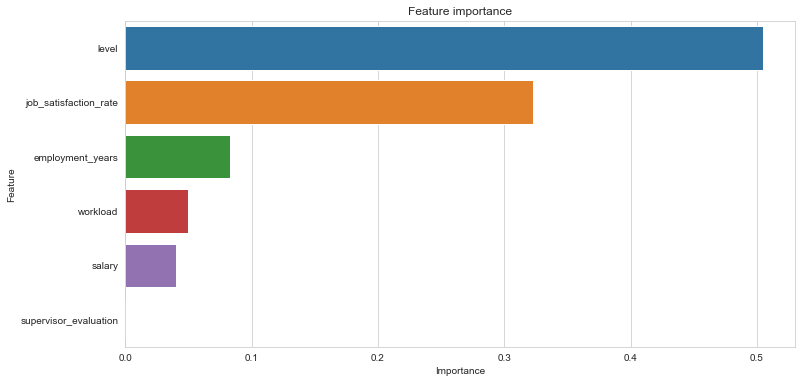

In [456]:
# feature importance
feature_importances = pd.DataFrame(
    {
        'Feature': np.concatenate((k_model1['preprocessor'].transformers_[0][1].get_feature_names_out(),
                   k_model1['preprocessor'].transformers_[1][1].get_feature_names_out(),
                   k_model1['preprocessor'].transformers_[2][1].get_feature_names_out())) \
                   [k_model1.steps[1][1].get_support(indices=True)],
        'Importance': k_model1.steps[2][1].feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))

ax = sb.barplot(x='Importance', y='Feature', data=feature_importances).set(title='Feature importance')

In [457]:
# check the best model for adequacy using DummyRegressor
dummy_mean1 = DummyClassifier(strategy = 'most_frequent').fit(X_train1, y_train1) 
dummy_mean1_preds = dummy_mean1.predict(X_test1)

print('ROC_AUC metric using DummyRegressor', roc_auc_score(y_test1, np.full((2000, ), 0.5)))

ROC_AUC metric using DummyRegressor 0.5


### Task #2 Conclusions <a id='section1_7'></a>

Best model: DecisionTreeClassifier(max_depth=4, max_features=7, min_samples_leaf=4, min_samples_split=6, random_state=42) with SelectKBest=6  
Best model cross-validation score: 0.91  
ROC_AUC score on the test set: 0.92

For the task of predicting employee resignation from the company — a binary "yes/no" target feature — four types of models were trained: Logistic Regression, K-Nearest Neighbors, Support Vector Machines, and DecisionTreeClassifier with different hyperparameters.  
OneHotEncoder and OrdinalEncoder were used for encoding, LabelEncoder was used for the target feature, and StandardScaler and MinMaxScaler were used as scalers.  
The DecisionTreeClassifier model performed the best for classification, as it handles a large number of categorical features better than the other models. The model with the best ROC_AUC score was selected using RandomizedSearch.

Most important features:
- Job position
- Employee job satisfaction level
- Duration of employment in the company (in years)

Least important features:
- Whether the employee received a promotion in the last year
- Whether the employee violated the labor contract in the last year
- Department the employee works in

## General Conclusion <a id='section2'></a>

**Research Goal:** Help the company minimize sudden employee attrition through predictive models.

**Research Task #1: Build a model to predict employee satisfaction based on client data.**
- The training and test data were loaded, examined, and analyzed. 
- Features were divided into categories: categorical, discrete numerical, and continuous numerical.
- During the data exploration, relevant charts and histograms were created, and feature distributions were analyzed.
- Correlation matrices were built, and correlations between features were studied.
- The training data was split into training and validation sets in a 3:1 ratio.
- A new metric, SMAPE (symmetric mean absolute percentage error), was created.
- A pipeline for data preparation was built: handling missing values, encoding, and scaling.
- Models such as Linear Regression and Decision Tree were trained with different hyperparameters (using the pipeline).
- Given the condition that the SMAPE metric on the test set should be <=15, the best model was selected.
- Using the best model, predictions were made on the test set, and the SMAPE score was calculated as 14.34.

**Conclusions and Recommendations for the Business:**  
To manage employee job satisfaction, it is recommended to focus on the following:
- The performance rating given by the supervisor.
- Expect lower satisfaction levels among employees who have been in the company for a shorter time, rather than those who have been there longer.
- Salary can affect the level of employee satisfaction and motivation.
- Whether the employee violated the labor contract in the last year and their job level are the 4th and 5th most important features, respectively.

**Research Task #2: Build a model to predict employee resignation based on client data.**
- The training and test data were loaded, examined, and analyzed. 
- Features were divided into categories: categorical, discrete numerical, and continuous numerical.
- During the data exploration, relevant charts and histograms were created, and feature distributions were analyzed.
- Correlation matrices were built, and correlations between features were studied.
- A new feature, "employee satisfaction level," was added from Task #1.
- The training data was split into training and validation sets in a 3:1 ratio.
- A pipeline for data preparation was built: handling missing values, encoding, and scaling.
- Models such as Logistic Regression, K-Nearest Neighbors, Support Vector Machines, and Decision Tree were trained with different hyperparameters (using the pipeline).
- Given the condition that the ROC_AUC metric on the test set should be 0.91, the best model was selected.
- Using the best model, predictions were made on the test set, and the ROC_AUC score was calculated as 0.92.

**Conclusions and Recommendations for the Business:**  
To prevent or avoid employee resignation, attention should be paid to the following:
- Monitor the employee job satisfaction level.
- Employees in higher positions tend to leave less frequently than those in lower positions.
- Employees who have recently joined the company tend to leave more frequently.
- The impact of salary level and workload on employee attrition is ranked 4th and 5th in importance, respectively.
